# Importing Required Libaries:

In [187]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gts\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gts\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gts\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unidecode
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore")

# Read the Data:

In [189]:
data=pd.read_csv(r"E:\Ak\oWn\cyberbylling-main\Dataset\youtube_parsed_dataset.csv")

# Data Description:

In [190]:
data.head(10)

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0
5,5,X6,jejus lindos de maiss carlos canta um ritmo ma...,12,1,3,3,0,27,0
6,6,X7,Ale pajac,1,0,3,5,0,23,0
7,7,X8,"How's ,freedom, working out for you? Still liv...",19,1,6,5,0,56,0
8,8,X9,nicki's too sexy holy hell oh. my. god. DON'T ...,8,0,3,5,0,20,0
9,9,X10,stupid video George Z had to do that in self d...,6,0,2,3,0,15,0


In [191]:
print("No.of rows in dataset:",data.shape[0])
print("No.of columns in dataset:",data.shape[1])

No.of rows in dataset: 3464
No.of columns in dataset: 10


# Exploring the Data:

#1) Check the null values:

#2) check the duplicate values in dataset:

#3) check the dtype of the dataset:

In [192]:
data.isnull().sum()

index                    0
UserIndex                0
Text                     0
Number of Comments       0
Number of Subscribers    0
Membership Duration      0
Number of Uploads        0
Profanity in UserID      0
Age                      0
oh_label                 0
dtype: int64

In [193]:
data.duplicated().sum()

0

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3464 entries, 0 to 3463
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  3464 non-null   int64 
 1   UserIndex              3464 non-null   object
 2   Text                   3464 non-null   object
 3   Number of Comments     3464 non-null   int64 
 4   Number of Subscribers  3464 non-null   int64 
 5   Membership Duration    3464 non-null   int64 
 6   Number of Uploads      3464 non-null   int64 
 7   Profanity in UserID    3464 non-null   int64 
 8   Age                    3464 non-null   int64 
 9   oh_label               3464 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 270.8+ KB


In [195]:
data["oh_label"].value_counts()

0    3047
1     417
Name: oh_label, dtype: int64

# Exploring Data Clasess:
#1) class= 0 represents Non_cyberbylling, class=1 represents cyberbylling

# Exploring the Data (Data visualization):

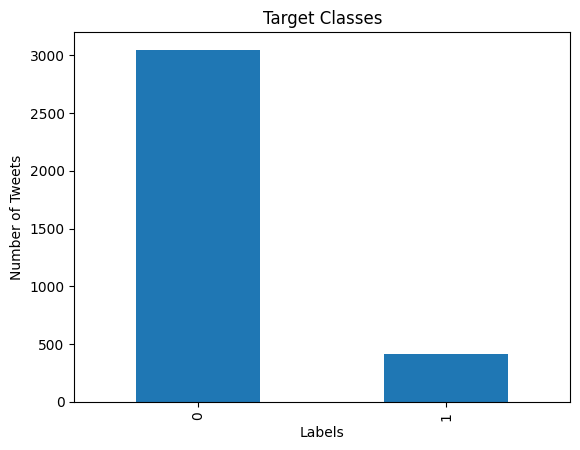

In [196]:
target_variable= data['oh_label'].value_counts()
target_variable.plot(kind='bar')
plt.title('Target Classes')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

# Data Transformation:

In [197]:
cyber_data=data.filter(items=["Text","oh_label"])
cyber_data.head()

,Text,oh_label
0,Does N.e.bodyelse Hear her Crazy ass Screamin ...,0
1,There are so many things that are incorrect wi...,0
2,3:26 hahah my boyfriend showed this song to me...,1
3,dick beyonce fuck y a ass hole you are truely ...,1
4,DongHaeTaemin and Kai ;A; luhansehun and bacon...,0


In [198]:
def case_convert():
    cyber_data.Text=[i.lower() for i in cyber_data.Text.values]

def remove_accents():
    cyber_data.Text=[unidecode.unidecode(text) for text in cyber_data.Text.values]

def remove_specials():
    cyber_data.Text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in cyber_data.Text.values]

def remove_stopwords():
    stopwords_set=set(stopwords.words("english"))
    cyber_data.Text=[word for word in cyber_data.Text if word not in stopwords_set]

def normalize_spaces():
    cyber_data.Text = [re.sub(r"\s+"," ",text) for text in cyber_data.Text.values]

def apply_lemmatizer():
    lemmatizer=WordNetLemmatizer()
    cyber_data.Text=[lemmatizer.lemmatize(word) for word in cyber_data.Text.values]

In [199]:
case_convert()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
apply_lemmatizer()

In [200]:
print(cyber_data)

                                                   Text  oh_label
0     does n e bodyelse hear her crazy ass screamin ...         0
1     there are so many things that are incorrect wi...         0
2      hahah my boyfriend showed this song to me i l...         1
3     dick beyonce fuck y a ass hole you are truely ...         1
4     donghaetaemin and kai a luhansehun and bacon x...         0
...                                                 ...       ...
3459  she pretty i love this song i miss the old kel...         1
3460  status online im zxkillergirlzx i m zxkillergi...         0
3461  jr so cute exo m better i agree like yeah yeah...         0
3462                                                            0
3463  great video and merry christmas from greece wh...         0

[3464 rows x 2 columns]


In [201]:
data_class_cyberbylling = cyber_data[cyber_data["oh_label"]==1]
data_class_nonbylling = cyber_data[cyber_data["oh_label"]==0]

In [202]:
print(data_class_cyberbylling.shape)
print(data_class_nonbylling.shape)

(417, 2)
(3047, 2)


In [203]:
data_class_cyberbylling=data_class_cyberbylling.sample(417)
data_class_nonbylling=data_class_nonbylling.sample(417)

In [204]:
cyber_data=pd.concat([data_class_cyberbylling,data_class_nonbylling],axis=0)

In [205]:
cyber_data.shape

(834, 2)

In [206]:
X=cyber_data["Text"]
X

1234    shut up white boy the jews shake n bake ie omg...
564     jessie you are the best i love you oh my god i...
1722    omg u really saw justin bieber thats so exciti...
2594    you re gorgeous i love these looks you got a n...
511     i am meeting them before the show on th feb th...
                              ...                        
1917    press for my christmas present to you wanna he...
2708    last day of school we did a flash mod to this ...
824     no one can do a show like madonna she s the qu...
3227    if i could ban one fkin thing from youtube jus...
1051    the black guy that broke day tv defiantly lost...
Name: Text, Length: 834, dtype: object

In [207]:
y=cyber_data["oh_label"]
y

1234    1
564     1
1722    1
2594    1
511     1
       ..
1917    0
2708    0
824     0
3227    0
1051    0
Name: oh_label, Length: 834, dtype: int64

In [208]:
TFIDF=TfidfVectorizer()
X=TFIDF.fit_transform(X)

In [209]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [210]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(667, 19439)
(167, 19439)
(667,)
(167,)


# Model Training and Evaluation:

In [211]:
def evaluate_models(true,predicted):
    specifivity=precision_score(true,predicted)
    sensitivity=recall_score(true,predicted)
    Accuracy=accuracy_score(true,predicted)
    return specifivity,sensitivity,Accuracy

In [212]:
models={
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SupportVectorClassifier":SVC(),
}

model_list=[]
accuracy_list=[]

for i in range(len(list(models))):
    print(i)
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make predictions:
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate train and Test datasets:
    model_train_specifivity,model_train_sensitivity,train_Accuracy=evaluate_models(y_train,y_train_pred)
    model_test_specifivity,model_test_sensitvity,test_Accuracy=evaluate_models(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    accuracy_list.append(test_Accuracy)
    

    print("Model Performance for Training Test")
    print("Specificivity:{:.4f}".format(model_train_specifivity))
    print("Sensitivity:{:.4f}".format(model_train_sensitivity))
    print("Accuracy:{:.4f}".format(train_Accuracy))
    print("**************************************************************************")
    print("Model Performance for Testing Test")
    print("Specificivity:{:.4f}".format(model_test_specifivity))
    print("Sensitivity:{:.4f}".format(model_test_sensitvity))
    print("Accuracy:{:.4f}".format(test_Accuracy))

0
DecisionTreeClassifier
Model Performance for Training Test
Specificivity:1.0000
Sensitivity:0.9942
Accuracy:0.9970
**************************************************************************
Model Performance for Testing Test
Specificivity:0.5067
Sensitivity:0.5067
Accuracy:0.5569
1
RandomForestClassifier
Model Performance for Training Test
Specificivity:0.9942
Sensitivity:1.0000
Accuracy:0.9970
**************************************************************************
Model Performance for Testing Test
Specificivity:0.5222
Sensitivity:0.6267
Accuracy:0.5749
2
SupportVectorClassifier
Model Performance for Training Test
Specificivity:0.9855
Sensitivity:0.9942
Accuracy:0.9895
**************************************************************************
Model Performance for Testing Test
Specificivity:0.5974
Sensitivity:0.6133
Accuracy:0.6407


# Results:

In [213]:
pd.DataFrame(list(zip(model_list,accuracy_list)),columns=["Model_Name","Accuracy"]).sort_values(by=["Accuracy"],ascending=False)

,Model_Name,Accuracy
2,SupportVectorClassifier,0.640719
1,RandomForestClassifier,0.574850
0,DecisionTreeClassifier,0.556886


# Predictions:

In [214]:
SVC=SVC()
SVC.fit(X_train,y_train)
y_pred=SVC.predict(X_test)


In [215]:
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [216]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[61, 31],
       [29, 46]], dtype=int64)

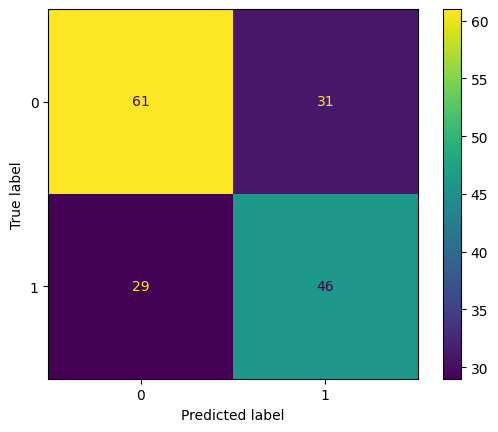

In [217]:
cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [221]:
comments=["HARDSTYLE MOTHA FUCKA!!!!!!!!!!!!!"]
vect = TFIDF.transform(comments).toarray()
Result=SVC.predict(vect)


In [222]:
if Result==1:
    print("Cyberbylling")
else:
    print("No_bylling")

Cyberbylling
